# Test notebook

### Example 0

In [1]:
print("hello!")

hello!


In [1]:
from libcamera import Transform
from picamera2 import Picamera2, Preview
import time

picam2 = Picamera2()
picam2.start_preview(Preview.QTGL, x=100, y=200, width=640, height=480,
                         transform=Transform(hflip=1))
picam2.start()
time.sleep(8)
picam2.stop_preview()
picam2.stop()

[5:39:40.895517428] [8440]  INFO Camera camera_manager.cpp:284 libcamera v0.2.0+46-075b54d5
[5:39:40.903602446] [8548]  INFO RPI pisp.cpp:662 libpisp version v1.0.4 6e3a53d137f4 14-02-2024 (14:00:12)
[5:39:40.913199207] [8548]  INFO RPI pisp.cpp:1121 Registered camera /base/axi/pcie@120000/rp1/i2c@80000/imx708@1a to CFE device /dev/media0 and ISP device /dev/media2 using PiSP variant BCM2712_C0
[5:39:40.914733396] [8440]  INFO Camera camera_manager.cpp:284 libcamera v0.2.0+46-075b54d5
[5:39:40.922759617] [8551]  INFO RPI pisp.cpp:662 libpisp version v1.0.4 6e3a53d137f4 14-02-2024 (14:00:12)
[5:39:40.932636083] [8551]  INFO RPI pisp.cpp:1121 Registered camera /base/axi/pcie@120000/rp1/i2c@80000/imx708@1a to CFE device /dev/media0 and ISP device /dev/media2 using PiSP variant BCM2712_C0
[5:39:42.770071699] [8440]  INFO Camera camera.cpp:1183 configuring streams: (0) 640x480-XBGR8888 (1) 1536x864-BGGR16_PISP_COMP1
[5:39:42.770209977] [8551]  INFO RPI pisp.cpp:1405 Sensor: /base/axi/pcie@1

(True, None)

In [2]:
test_cam = Picamera2()
test_cam.start_preview(Preview.QTGL, x=100, y=200, width=640, height=480,
                         transform=Transform(hflip=1))
test_cam.start()
time.sleep(8)
test_cam.stop_preview()
test_cam.stop()

Camera __init__ sequence did not complete.
[5:39:53.272843222] [8440] ERROR Camera camera.cpp:675 Camera in Configured state trying acquire() requiring state Available


RuntimeError: Camera __init__ sequence did not complete.

In [ ]:
# basic cv example
import cv2 as cv
import sys

img = cv.imread("data/horses.jpg")
cv.imshow("Disp window", img)
k = cv.waitKey(0)

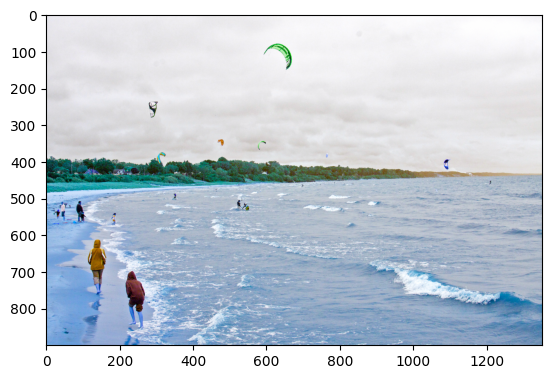

In [3]:
# basic cv example with matplotlib
import cv2 as cv
import sys
%matplotlib inline

from matplotlib import pyplot as plt

img2 = cv.imread("data/kite.jpg")

plt.imshow(img2)
plt.show()
# RGB channels are messed upyep

In [ ]:
# ipywebrtc test
from ipywebrtc import CameraStream, VideoStream, ImageRecorder

camera = CameraStream(constraints = 
                      {'facing_mode': 'user',
                       'audio': False,
                       'video': {'width': 640, 'height': 480}
                      })
camera

### Example 2

In [7]:
from picamera2 import Picamera2

import cv2

# instantiate camera instance
picam2 = Picamera2()

# create a config with desired attributes: format, size, framerate
# NOTE: camera resolution 3280x2464, downsamples at 820x616, crops at 640x480
config = picam2.create_preview_configuration(
    main={'format': 'XRGB8888', 'size': (820, 616)},
    controls={'FrameDurationLimits': (16667, 16667)})

# set camera configuration, start camera
picam2.configure(config)
picam2.start()

# start opencv window thread
cv2.startWindowThread()
wnd_name = 'foo'
cv2.namedWindow(wnd_name, cv2.WINDOW_AUTOSIZE)

while True:
    # get current image data from 'main' camera stream
    arr1 = picam2.capture_array('main')

    # resize the image data using bi-linear interpolation
    arr2 = cv2.resize(arr1, (640, 480), 0, 0, cv2.INTER_LINEAR)

    # show resized image
    cv2.imshow(wnd_name, arr2)


[1:50:00.406263486] [6149]  INFO Camera camera_manager.cpp:284 libcamera v0.2.0+46-075b54d5
[1:50:00.415483331] [9525]  INFO RPI pisp.cpp:662 libpisp version v1.0.4 6e3a53d137f4 14-02-2024 (14:00:12)
[1:50:00.428630403] [9525]  INFO RPI pisp.cpp:1121 Registered camera /base/axi/pcie@120000/rp1/i2c@80000/imx708@1a to CFE device /dev/media0 and ISP device /dev/media1 using PiSP variant BCM2712_C0
[1:50:00.431754574] [6149]  INFO Camera camera_manager.cpp:284 libcamera v0.2.0+46-075b54d5
[1:50:00.443000033] [9528]  INFO RPI pisp.cpp:662 libpisp version v1.0.4 6e3a53d137f4 14-02-2024 (14:00:12)
[1:50:00.456524327] [9528]  INFO RPI pisp.cpp:1121 Registered camera /base/axi/pcie@120000/rp1/i2c@80000/imx708@1a to CFE device /dev/media0 and ISP device /dev/media1 using PiSP variant BCM2712_C0
[1:50:00.460417795] [6149]  INFO Camera camera.cpp:1183 configuring streams: (0) 820x616-XRGB8888 (1) 1536x864-BGGR16_PISP_COMP1
[1:50:00.460554499] [9528]  INFO RPI pisp.cpp:1405 Sensor: /base/axi/pcie@1

KeyboardInterrupt: 